<a href="https://colab.research.google.com/github/Emiliewu/datascience-assignments/blob/main/week2_project_1_part_2_(core)_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction

Emilie Wu

Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

Part 2: 

We will continue to work off of the GitHub repository we created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link in the learn platform.
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

Link to the original dataset on Kaggle

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Variable Name  |Description
-------------------|------------------
Item_Identifier	   | Unique product ID
Item_Weight	       | Weight of product
Item_Fat_Content	 | Whether the product is low fat or regular
Item_Visibility	   | The percentage of total display area of all products in a store allocated to the particular product
Item_Type	         | The category to which the product belongs
Item_MRP	         | Maximum Retail Price (list price) of the product
Outlet_Identifier	 | Unique store ID
Outlet_Establishment_| Year	The year in which store was established
Outlet_Size	    | The size of the store in terms of ground area covered
Outlet_Location_Type | 	The type of area in which the store is located
Outlet_Type	| Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	| Sales of the product in the particular store. This is the target variable to be predicted.






# Imports

In [20]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Preview Data

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# save the path to fpath
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
# load data from fpath and save into df
df = pd.read_csv(fpath)


In [7]:
# display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# preview data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

1) How many rows and columns?
* rows - 8523
* columns 12

2) What are the datatypes of each variable?

 index |  Column  |  Non-Null Count  |  Dtype  
-------------------|--------------------|------------------|------------------
 0 |    Item_Identifier   |           8523 non-null |    object 
 1  | Item_Weight       |         7060 non-null |  float64
 2  |   Item_Fat_Content      |       8523 non-null |    object 
 3   |  Item_Visibility    |          8523 non-null |    float64
 4 |  Item_Type       |           8523 non-null  | object 
 5 |  Item_MRP        |           8523 non-null  | float64
 6 |  Outlet_Identifier     |     8523 non-null  | object 
 7  | Outlet_Establishment_Year | 8523 non-null |  int64  
 8 |  Outlet_Size    |            6113 non-null  | object 
 9 |  Outlet_Location_Type   |    8523 non-null  | object 
 10 | Outlet_Type         |       8523 non-null |  object 
 11|  Item_Outlet_Sales    |      8523 non-null |  float64

In [12]:
# how many rows and columns can use .shape
df.shape


(8523, 12)

In [13]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Duplicated Data

### Checking for duplicated data:

In [16]:
duplicated_rows = df.duplicated(keep = False).sum()
duplicated_rows

0

# Missing Values

### Checking for missing values:

In [17]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Identifying % of missing data

In [18]:
df.isna().sum() / len(df) *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64



*   Missing Values
      - Item_Weight - missing 1463 values
      - Outlet_Size - missing 2410 values

*   In order to make informed decisions about how to handle missing data, we will do some addtional EDA.

Inspecting Experience Level:
* Here we are setting the style to use for seaborn so that all the visuals have the same format.



In [21]:
# using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background', 'seaborn-muted', 'seaborn-poster'])

<ipython-input-21-a20cbb4e203d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background', 'seaborn-muted', 'seaborn-poster'])
<ipython-input-21-a20cbb4e203d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background', 'seaborn-muted', 'seaborn-poster'])


In [38]:
df['Item_Weight'].value_counts()

0.000     1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

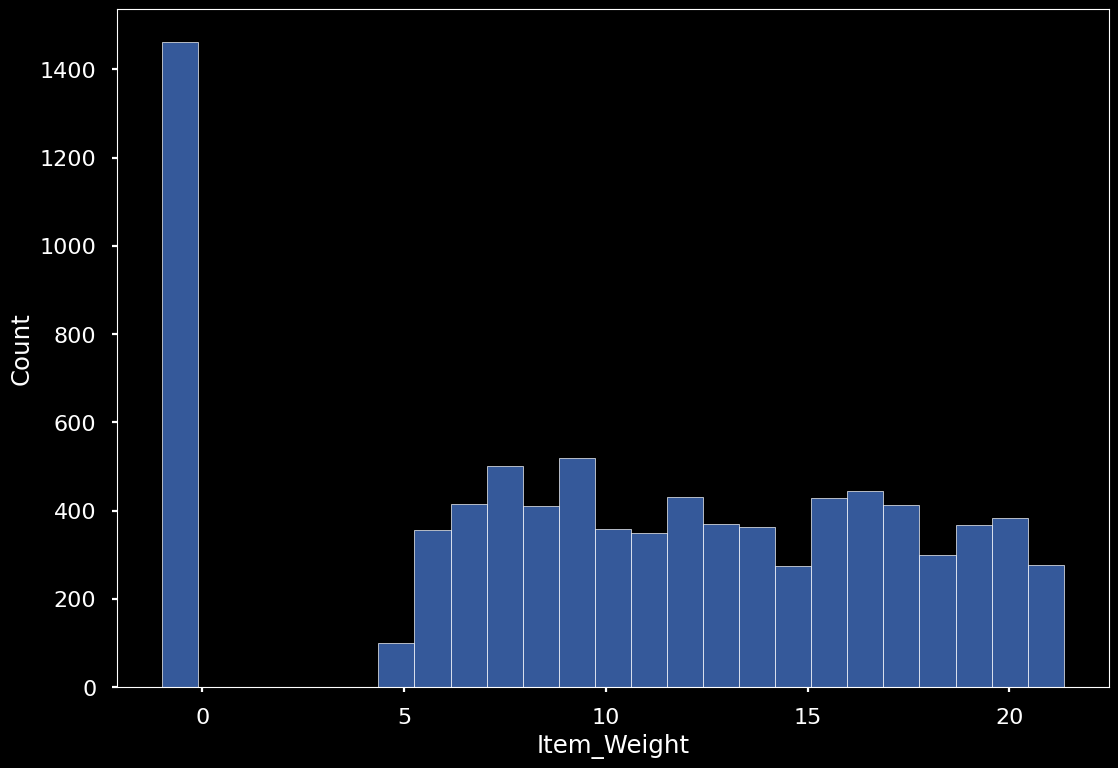

In [35]:
# ax = sns.countplot(data = df, x = 'Item_Weight');
ax = sns.histplot(data = df, x = 'Item_Weight');

* This graph shows that about most Items weight less than 20.
  - Strategy #1: To deal with the missing values, we could simply drop the missing values.
  - Strategy #2: To deal with the missing values, we could fill them in with the most frequent for this feature.
  - Strategy #3: To deal with the missing values, we could fill them in with the median/mean value for this feature

To maintain as much data as possible, we will not drop the data. So we will choose either Strategy #2 or Strategy #3. To make this choice we will do a bit more investigating.



In [42]:

df['Item_Weight'] = df['Item_Weight'].replace(-1, 0)


In [43]:
# find the most frequent
most_frequent = df.loc[df['Item_Weight'] != 0, 'Item_Weight'].mode()[0]
most_frequent

12.15

In [45]:
# find the median
item_weight_median = df['Item_Weight'][df['Item_Weight'] != 0].median()
item_weight_median

12.6

In [46]:
# find mean
item_weight_mean = df.loc[df['Item_Weight'] != 0, 'Item_Weight'].mean()
item_weight_mean

12.857645184135977

As the result of most frequent, median and mean are all around 12. This time we will just use most frequent to replace all missing data.

In [47]:
df['Item_Weight'] = df['Item_Weight'].replace(0, 12.15)

In [48]:
# confirm the change
df.isna().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [49]:
df['Item_Weight'].value_counts()

12.150    1549
17.600      82
13.650      77
11.800      76
9.300       68
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

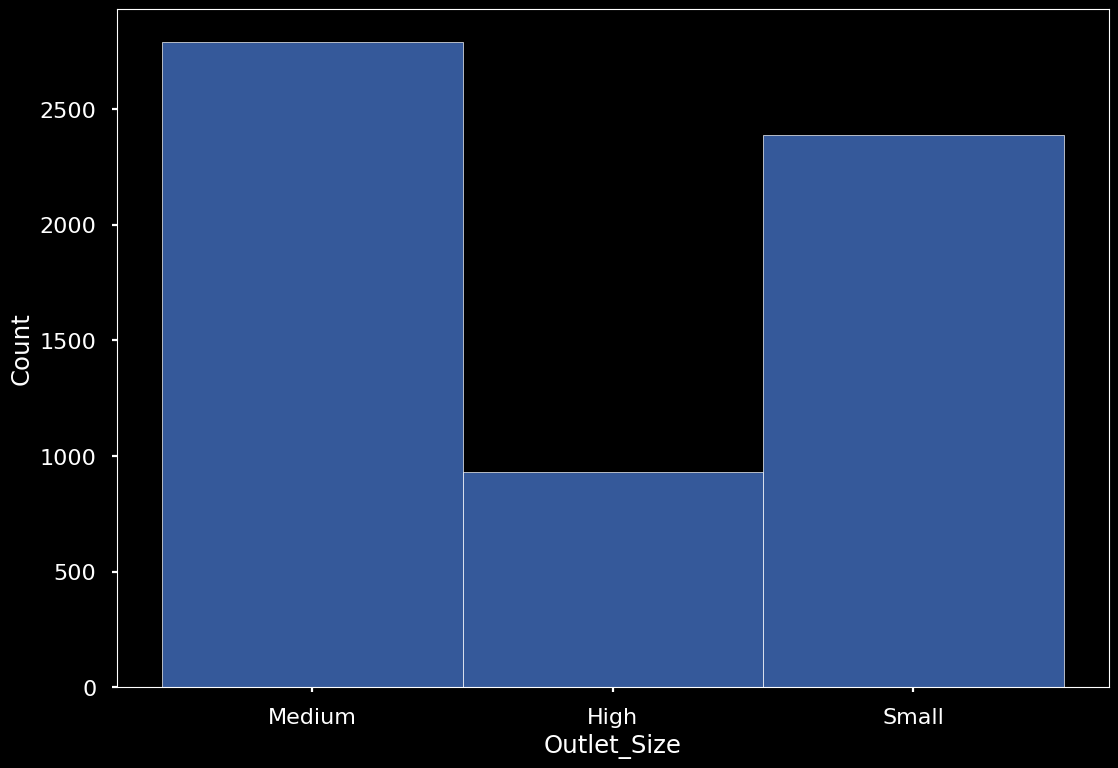

In [31]:
ax = sns.histplot(data = df, x = 'Outlet_Size')

* This histogram shows that the majority of Outlet_Size are small and medium.
  - Strategy #1: To deal with the missing values, we could simply drop the missing values.
  - Strategy #2: To deal with the missing values, we could fill them in with the most frequent for this feature.
  - Strategy #3: To deal with the missing values, we could fill them in with the word 'unknown' value for this feature.

We will select Strategy #3 to fill in the missing values with the word 'unknown' so that the values will be filled in, but we will still be aware that those values are unknow.

In [50]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'unknown')

In [51]:
df['Outlet_Size'].value_counts()

Medium     2793
unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [52]:
# confirm there is no missing data
df.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

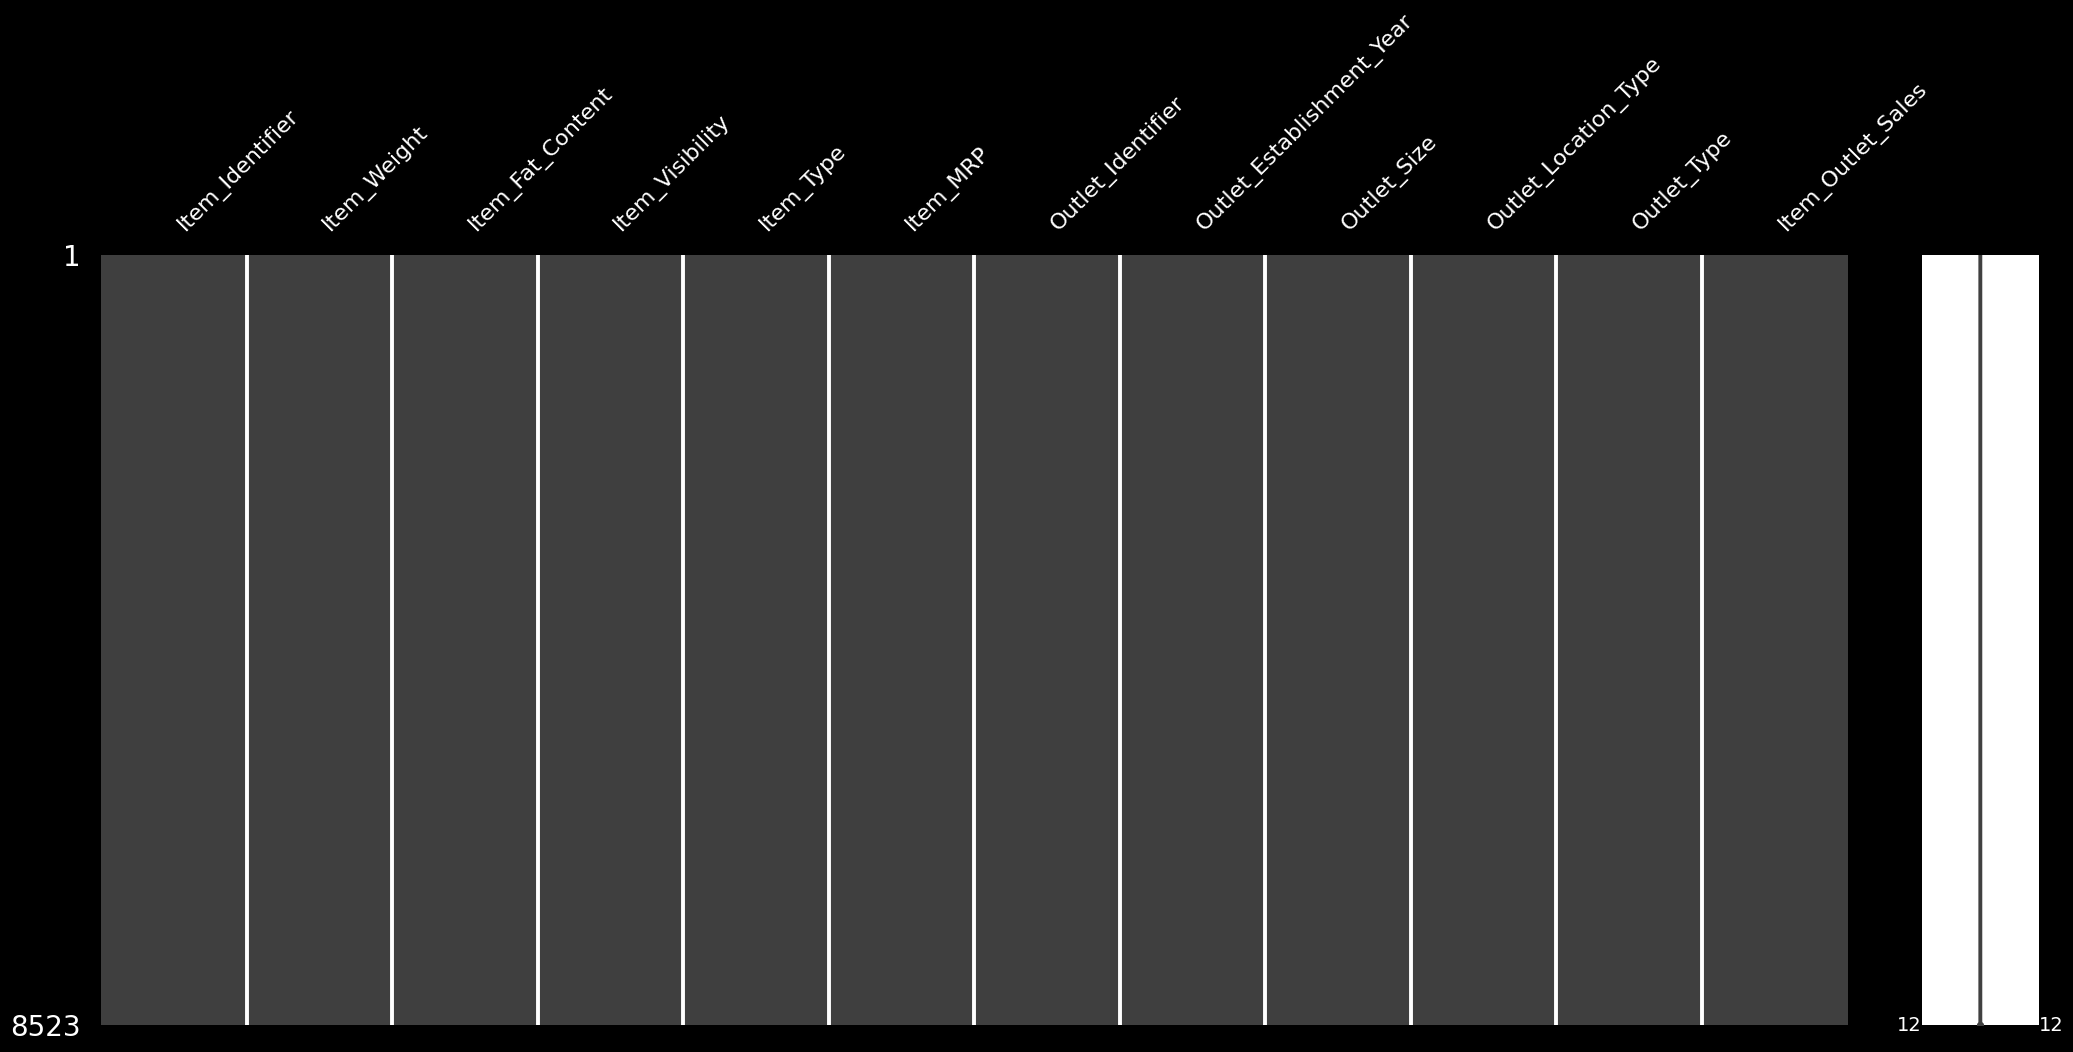

In [53]:
# use missingno to confirm no more nulls
msno.matrix(df)

# Consistent Values

find and fix any inconsistent categories of data

In [54]:
# save a list of object columns by using select_dtypes
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

* Check the nunique for just the object cols

In [55]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [56]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

* 'Item_Fat_Content' column has inconsistent data:
  - LF should be 'Low Fat'
  - reg should be 'Regular'
  - low fat should be 'Low Fat

In [62]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat'})

In [63]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [64]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [57]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [58]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [59]:
df['Outlet_Size'].value_counts()

Medium     2793
unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [60]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [61]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# Summary Statistics for Numeric Features

For any numerical columns, obtain the summary statistics of each (min, max, mean).

---



In [65]:
# use df.describe() to view the summary statistics for the numeric features
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.74,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.15,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


* method to look at just the mean, min, and max for each numeric column.

In [67]:
stats = df.describe()
stats.loc[['mean', 'min', 'max']].round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.74,0.07,140.99,1997.83,2181.29
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
